텍스트 마이닝 프로세스

[전처리]
1. 토큰화(tokenization)
 - 텍스트를 특정 단위(형태소-morph, 단어, 글자-character)로 분류(예. 문장을 단어로 분류)


2. 불용어 삭제(stopwords removal)
 - 불필요한 단어 삭제


3. 대소문자 통일
 - 같은 단어라도 대소문자가 다르면 다른 벡터로 인식


4. 어근 추출(stemming and lemmatization)
 - 단어 통일(예. 과거 현재 미래형 단어 통일)
 
 1) lemmatization : 사전에 있는 단어로 표현
 
 2) stemming : 규칙(알고리즘)에 의해 변환된 단어로 표현(신조어나 모르는 단어가 나올땐 stemming 처리 필요)
  
  @ 일반적으로 lemma -> stemming 순으로 진행
 

5. 인코딩(encoding)
 - 텍스트를 숫자로 인코딩(벡터화, vector space model)
 
 1) bag of words(말뭉치)
 
 2) tf-idf(term Frequency - inverse document frequency)
 
      tf = 문서d안에 있는 단어 t의 빈도
    
      df = 단어가 등장한 문서의 수
    
      idf = 1/df <- 모든 문서에 등장한 단어는 가중치 작음
    
    * 문서 하나에 많이 나오는단어가 다른 문서들에 안나오면 tf-idf값이 높아, 해당 단어는 그 문서의 키워드가 될 수 있음


[분석]

1. 워드 클라우드 : 빈도 등 가중치가 높은 단어를 잘 보이게 시각화


2. 토픽모델링 : 토픽을 단어의 묶음으로 정리 - 모든 단어들이 각 토픽에 속할 확률 계산

   - LDA, DTM 있음, 분석가의 주관으로 토픽 생성


3. 감정분석 : 지도/비지도 있음 ( 확장개념으로 opinion mining이라고 불림)


4. 텍스트 분류 : 지정 카테고리로 분류svm, rf, naive bayes



In [20]:
# JAVA 환경 관련 오류 시, 사용
import os
print('JAVA_HOME' in os.environ)

False


In [21]:
# JAVA 환경 강제 할당
os.environ['JAVA_HOME'] = r"C:\Program Files\Java\jdk-19\bin\server"

In [22]:
print('JAVA_HOME' in os.environ)

True


In [26]:
# 분석 데이터
data = """한국은행 가족 여러분!
오늘은 2022년 새해 첫 업무를 시작하는 날입니다. 먼저 지난 한 해에도 팬데믹이라는 어려운 근무환경에서 맡은 바 직무를 성실히 수행해 주신 임직원 여러분께 진심으로 감사드립니다.
지난해 우리 경제는 코로나19의 영향이 이어지는 가운데서도 예상보다 빠르게 반등하였습니다. 수출과 설비투자가 글로벌 수요 확대에 힘입어 호조를 지속하였습니다. 소비는 감염병 확산세에 영향받는 상황에서도 부진이 점차 완화되는 모습을 보였습니다. 소비자물가는 국제원자재가격이 크게 상승한 데다 경기회복 과정에서 수요압력도 커지면서 오름세가 빠르게 확대되었습니다. 한편으로는 자산시장으로의 자금쏠림과 가계부채 누증으로 금융불균형 심화에 대한 우려가 한층 커졌습니다.
한국은행은 이와 같은 여건 변화를 고려하여 코로나19 발생 이후 크게 완화하였던 통화정책 기조를 점진적으로 정상화해 나가고 있습니다. 기준금리를 두 차례 인상하였으며, 소기의 목적이 달성되었다고 판단되는 한시적 금융지원 조치들도 단계적으로 종료하였습니다. 다만 계속 어려움을 겪는 소상공인 등 취약부문에 대해서는 대출지원을 강화하였습니다.
금년에도 국내경제는 수출과 투자가 양호한 흐름을 유지하면서 꾸준한 성장세를 나타낼 것으로 예상됩니다. 그러나 우리 경제 안팎의 불확실성은 여전히 높습니다.
새로운 변이 바이러스의 출현으로 팬데믹 상황이 언제 종식될지 아직 가늠하기 어렵습니다. 글로벌 공급차질과 기후변화 대응 등의 영향으로 높아진 인플레이션이 당초 예상보다 더 오래 지속될 것이라는 우려도 커지고 있습니다. 이에 따라 세계 각국의 통화정책 정상화 속도가 빨라지고 있습니다. 또한 주요국간 경쟁과 갈등의 골이 깊어지면서 글로벌 가치사슬이 크게 변화하고 있습니다. 팬데믹 이후 확대된 비대면 관행은 사회 모든 부문에서 디지털 전환을 재촉하고 있습니다. 우리 경제와 교역비중이 높은 중국 경제는 구조변화를 겪으면서 성장세가 둔화될 것이라는 전망이 늘고 있습니다.
우리 내부로 눈을 돌려 보면, 최근 방역조치 강화로 대면서비스업의 어려움이 가중되고 소비회복세가 제약될 것이라는 걱정이 커지고 있습니다. 코로나19 위기 이후 한층 늘어난 경제주체들의 채무는 우리 경제의 취약성을 높이는 요인으로 작용할 수 있습니다.
이러한 대내외 여건변화는 우리에게 실로 많은 과제를 안겨주고 있습니다.
우선 감염병 상황으로 인해 피해를 입고 있는 취약계층이 어려움에서 조속히 벗어날 수 있도록 향후 부작용이 최소화되는 범위 내에서 이들을 적극 지원해야 할 것입니다. 또한 과잉 부채와 같은 우리 내부의 약한 고리는 대외환경이 악화될 때 위험에 노출되기 마련입니다. 지금과 같이 대외 불확실성이 높은 상황에서는 우리의 취약점을 냉정한 눈으로 미리 찾아서 적극 해소해 나가야 하겠습니다.
장기적인 관점에서 우리 경제가 안정적인 성장세를 지속할 수 있는 환경을 만드는 데도 힘써야 할 것입니다. 생산성을 높이고 성장잠재력을 키우는 동력은 결국 민간의 창의성과 투자입니다. 혁신이 싹트고 새로운 기술이 사회 각 분야에 활용되어 일자리로까지 이어지도록 해야 합니다. 이러한 혁신의 생태계가 원활히 작동할 수 있도록 법적·제도적 인프라를 속도감있게 정비하는 한편, 기초 R&D 투자 등 민간이 전적으로 담당하기 어려운 부문에 대해서는 과감한 정책적 지원이 이루어져야 하겠습니다. 특히 당면한 디지털 전환, 글로벌 가치사슬 재편, 저탄소 경제로의 이행은 큰 도전으로 다가올 수 있지만, 정부와 민간이 함께 역량을 모아 슬기롭게 대처한다면 재도약의 기회가 될 수도 있을 것입니다.
임직원 여러분!
이제 우리 한국은행이 올해 중점을 두고 추진해야 할 주요 업무에 대해 말씀드리겠습니다.
먼저 경제 상황의 개선에 맞추어 통화정책의 완화 정도를 적절히 조정해 나가야 하겠습니다. 이 과정에서 완화 정도의 추가 조정 시기는 성장과 물가 흐름을 면밀히 점검하는 가운데 금융불균형 상황과 주요국 통화정책 변화의 영향을 함께 짚어가며 판단해야 할 것입니다. 특히 그간 높아진 물가와 기대인플레이션이 상호작용하여 물가 오름세가 예상보다 길어질 가능성은 없는지 잘 살펴보아야 하겠습니다. 대출제도를 운영함에 있어서는 소상공인·자영업자 등 취약계층에 대한 선별적 지원을 당분간 유지하되, 지원제도의 효율성을 제고해 나가면서 코로나 이후 상황을 대비한 중장기 개선방안도 함께 모색해야 하겠습니다.
금융·외환시장이 안정을 유지할 수 있도록 각별히 힘써야 하겠습니다. 미 연준 등 주요국 중앙은행들이 높아진 인플레이션 압력에 대응하여 금리인상을 이미 시작하였거나 예고하고 있습니다. 이같은 각국의 통화정책 정상화 과정에서 국제금융시장의 가격변수와 자본유출입의 변동성이 증폭될 수 있습니다. 불안 요인을 면밀히 모니터링하면서 필요한 경우 시장안정화 조치를 적기에 시행해야 할 것입니다. 아울러 각종 금융지원의 정상화 과정에서 가계 및 기업 부채의 잠재 부실이 현재화될 가능성도 배제할 수 없습니다. 차주의 채무상환능력 등 금융시스템의 위험요인을 상시 점검하고 정부와 협력하여 적절한 대응방안을 강구해 나가야 하겠습니다.
지급결제 환경 변화에 능동적으로 대처해 나가야 할 것입니다. 디지털 경제로의 빠른 진전에 대응하여 중앙은행 디지털화폐(CBDC) 도입과 관련한 기술적·제도적 연구를 한층 더 강화해야 하겠습니다. 이와 함께 지급결제 시스템의 안전성을 확보할 수 있도록 새로운 지급서비스를 제공하는 빅테크 기업 등을 효과적으로 감시할 수 있는 체계를 구축해 나가야 합니다. 지급결제 혁신 과정에서 사회적 취약계층의 현금 접근성이 제약되지 않도록 금융포용(financial inclusion) 노력도 기울여야 할 것입니다.
현재의 통화정책 운영체계에 개선할 점이 있는지 검토해야 하겠습니다. 이의 일환으로 코로나19 이후 인플레이션 동학에 구조적 변화가 진행되고 있을 가능성에 대해 점검하는 한편, 현행 정책운용의 틀에 금융안정을 보다 체계적으로 고려할 수 있는 방안이 있는지 연구해 나가야 할 것입니다.
아울러 정책환경 변화를 반영하여 한국은행의 역할을 재정비하는 노력도 지속해야 하겠습니다. 인구구조 변화, 불평등 확대, 기후변화 등 중앙은행으로서도 외면할 수 없는 사회·경제적 중요 어젠다들을 통화정책 운영에 어떻게 고려할 수 있는지에 대해 보다 적극적으로 고민해야 할 것입니다. 특히 기후변화는 더 이상 잠재리스크가 아닌 당면한 과제가 되어 있는 만큼, 저탄소 경제로의 순조로운 이행에 기여할 수 있도록 한국은행이 가진 정책수단을 활용할 수 있는 현실성 있는 대안을 찾아 나가야 하겠습니다.
임직원 여러분!
급속한 경제환경 변화 속에서 한국은행이 국민의 기대에 부응하여 최고의 전문성을 갖춘 정책기관으로 거듭나기 위해서는 이에 걸맞은 조직의 변화와 혁신을 이루어내야 합니다. 이를 위해 우리는 외부 전문기관의 컨설팅 결과와 직원들의 광범위한 의견을 바탕으로 조직·인사 각 분야별 혁신 방안과 이행 로드맵을 담은 ‘중장기 경영인사 혁신방안’을 마련 중에 있습니다.
이 방안이 성공적으로 마무리되어 향후 혁신 추진 과정에서 중심축 역할을 할 수 있기를 기대하며, 우리의 노력이 결실을 맺기 위해서는 혁신의 주체인 직원들의 지속적인 관심과 참여가 필수적이라는 점을 새삼 강조할 필요가 없겠습니다.
한국은행 가족 여러분!
지난 두 해 동안 모든 임직원이 코로나19라는 미증유의 환경에서 우리 경제의 회복과 안정을 위해 각고의 노력을 기울여 왔습니다. ‘불확실성의 상시화’라는 어려운 정책여건에서도 한국은행이 맡은 책무를 충실히 수행할 수 있었던 것은 여러분 모두가 각자의 위치에서 최선을 다했기 때문입니다. 금년에도 우리 경제가 마주하게 될 안팎의 상황이 결코 녹록지 않습니다. 임직원 모두가 긴장의 끈을 늦추지 말고 자신의 역할과 소임을 다해주기를 당부드립니다.
올 한 해가 팬데믹의 마지막 해가 될 수 있기를 소망하며, 새해를 맞이하여 모쪼록 여러분의 가정에 건강과 행복이 가득하기를 기원합니다.
감사합니다."""

In [47]:
data

'한국은행 가족 여러분!\n오늘은 2022년 새해 첫 업무를 시작하는 날입니다. 먼저 지난 한 해에도 팬데믹이라는 어려운 근무환경에서 맡은 바 직무를 성실히 수행해 주신 임직원 여러분께 진심으로 감사드립니다.\n지난해 우리 경제는 코로나19의 영향이 이어지는 가운데서도 예상보다 빠르게 반등하였습니다. 수출과 설비투자가 글로벌 수요 확대에 힘입어 호조를 지속하였습니다. 소비는 감염병 확산세에 영향받는 상황에서도 부진이 점차 완화되는 모습을 보였습니다. 소비자물가는 국제원자재가격이 크게 상승한 데다 경기회복 과정에서 수요압력도 커지면서 오름세가 빠르게 확대되었습니다. 한편으로는 자산시장으로의 자금쏠림과 가계부채 누증으로 금융불균형 심화에 대한 우려가 한층 커졌습니다.\n한국은행은 이와 같은 여건 변화를 고려하여 코로나19 발생 이후 크게 완화하였던 통화정책 기조를 점진적으로 정상화해 나가고 있습니다. 기준금리를 두 차례 인상하였으며, 소기의 목적이 달성되었다고 판단되는 한시적 금융지원 조치들도 단계적으로 종료하였습니다. 다만 계속 어려움을 겪는 소상공인 등 취약부문에 대해서는 대출지원을 강화하였습니다.\n금년에도 국내경제는 수출과 투자가 양호한 흐름을 유지하면서 꾸준한 성장세를 나타낼 것으로 예상됩니다. 그러나 우리 경제 안팎의 불확실성은 여전히 높습니다.\n새로운 변이 바이러스의 출현으로 팬데믹 상황이 언제 종식될지 아직 가늠하기 어렵습니다. 글로벌 공급차질과 기후변화 대응 등의 영향으로 높아진 인플레이션이 당초 예상보다 더 오래 지속될 것이라는 우려도 커지고 있습니다. 이에 따라 세계 각국의 통화정책 정상화 속도가 빨라지고 있습니다. 또한 주요국간 경쟁과 갈등의 골이 깊어지면서 글로벌 가치사슬이 크게 변화하고 있습니다. 팬데믹 이후 확대된 비대면 관행은 사회 모든 부문에서 디지털 전환을 재촉하고 있습니다. 우리 경제와 교역비중이 높은 중국 경제는 구조변화를 겪으면서 성장세가 둔화될 것이라는 전망이 늘고 있습니다.\n우리 내부로 눈을 돌려 보면, 최근 방역조치 

In [61]:
# 띄어쓰기로 문단 나누기
data_lines = data.splitlines()

In [62]:
data_lines

['한국은행 가족 여러분!',
 '오늘은 2022년 새해 첫 업무를 시작하는 날입니다. 먼저 지난 한 해에도 팬데믹이라는 어려운 근무환경에서 맡은 바 직무를 성실히 수행해 주신 임직원 여러분께 진심으로 감사드립니다.',
 '지난해 우리 경제는 코로나19의 영향이 이어지는 가운데서도 예상보다 빠르게 반등하였습니다. 수출과 설비투자가 글로벌 수요 확대에 힘입어 호조를 지속하였습니다. 소비는 감염병 확산세에 영향받는 상황에서도 부진이 점차 완화되는 모습을 보였습니다. 소비자물가는 국제원자재가격이 크게 상승한 데다 경기회복 과정에서 수요압력도 커지면서 오름세가 빠르게 확대되었습니다. 한편으로는 자산시장으로의 자금쏠림과 가계부채 누증으로 금융불균형 심화에 대한 우려가 한층 커졌습니다.',
 '한국은행은 이와 같은 여건 변화를 고려하여 코로나19 발생 이후 크게 완화하였던 통화정책 기조를 점진적으로 정상화해 나가고 있습니다. 기준금리를 두 차례 인상하였으며, 소기의 목적이 달성되었다고 판단되는 한시적 금융지원 조치들도 단계적으로 종료하였습니다. 다만 계속 어려움을 겪는 소상공인 등 취약부문에 대해서는 대출지원을 강화하였습니다.',
 '금년에도 국내경제는 수출과 투자가 양호한 흐름을 유지하면서 꾸준한 성장세를 나타낼 것으로 예상됩니다. 그러나 우리 경제 안팎의 불확실성은 여전히 높습니다.',
 '새로운 변이 바이러스의 출현으로 팬데믹 상황이 언제 종식될지 아직 가늠하기 어렵습니다. 글로벌 공급차질과 기후변화 대응 등의 영향으로 높아진 인플레이션이 당초 예상보다 더 오래 지속될 것이라는 우려도 커지고 있습니다. 이에 따라 세계 각국의 통화정책 정상화 속도가 빨라지고 있습니다. 또한 주요국간 경쟁과 갈등의 골이 깊어지면서 글로벌 가치사슬이 크게 변화하고 있습니다. 팬데믹 이후 확대된 비대면 관행은 사회 모든 부문에서 디지털 전환을 재촉하고 있습니다. 우리 경제와 교역비중이 높은 중국 경제는 구조변화를 겪으면서 성장세가 둔화될 것이라는 전망이 늘고 있습니다.',
 '우리 내부로

In [64]:
import pandas as pd
data_lines = pd.DataFrame(data_lines, columns = ['lines'])
data_lines.head()

,lines
0,한국은행 가족 여러분!
1,오늘은 2022년 새해 첫 업무를 시작하는 날입니다. 먼저 지난 한 해에도 팬데믹이...
2,지난해 우리 경제는 코로나19의 영향이 이어지는 가운데서도 예상보다 빠르게 반등하였...
3,한국은행은 이와 같은 여건 변화를 고려하여 코로나19 발생 이후 크게 완화하였던 통...
4,금년에도 국내경제는 수출과 투자가 양호한 흐름을 유지하면서 꾸준한 성장세를 나타낼 ...


In [65]:
data_lines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lines   24 non-null     object
dtypes: object(1)
memory usage: 320.0+ bytes


In [23]:
# 형태소 분석기 불러오기
from konlpy.tag import Komoran

komoran = Komoran()

텍스트 데이터 전처리

1. 토큰화

In [69]:
# 형태소 단위로 토큰화 + 품사 정보 삽입
data_lines['tokens_pos_tag'] = data_lines['lines'].map(lambda x : komoran.pos(x))
data_lines.head()

,lines,tokens,tokens_pos_tag
0,한국은행 가족 여러분!,"[(한국은행, NNP), (가족, NNG), (여러분, NNP), (!, SF)]","[(한국은행, NNP), (가족, NNG), (여러분, NNP), (!, SF)]"
1,오늘은 2022년 새해 첫 업무를 시작하는 날입니다. 먼저 지난 한 해에도 팬데믹이...,"[(오늘, NNG), (은, JX), (2022, SN), (년, NNB), (새해...","[(오늘, NNG), (은, JX), (2022, SN), (년, NNB), (새해..."
2,지난해 우리 경제는 코로나19의 영향이 이어지는 가운데서도 예상보다 빠르게 반등하였...,"[(지난해, NNG), (우리, NP), (경제, NNG), (는, JX), (코로...","[(지난해, NNG), (우리, NP), (경제, NNG), (는, JX), (코로..."
3,한국은행은 이와 같은 여건 변화를 고려하여 코로나19 발생 이후 크게 완화하였던 통...,"[(한국은행, NNP), (은, JX), (이, NP), (와, JKB), (같, ...","[(한국은행, NNP), (은, JX), (이, NP), (와, JKB), (같, ..."
4,금년에도 국내경제는 수출과 투자가 양호한 흐름을 유지하면서 꾸준한 성장세를 나타낼 ...,"[(금년, NNG), (에, JKB), (도, JX), (국내, NNG), (경제,...","[(금년, NNG), (에, JKB), (도, JX), (국내, NNG), (경제,..."


In [73]:
# 형태소 단위로 토큰화
data_lines['tokens_morphs'] = data_lines['lines'].map(lambda x : komoran.morphs(x))
data_lines.head()

,lines,tokens,tokens_pos_tag,tokens_morphs
0,한국은행 가족 여러분!,"[(한국은행, NNP), (가족, NNG), (여러분, NNP), (!, SF)]","[(한국은행, NNP), (가족, NNG), (여러분, NNP), (!, SF)]","[한국은행, 가족, 여러분, !]"
1,오늘은 2022년 새해 첫 업무를 시작하는 날입니다. 먼저 지난 한 해에도 팬데믹이...,"[(오늘, NNG), (은, JX), (2022, SN), (년, NNB), (새해...","[(오늘, NNG), (은, JX), (2022, SN), (년, NNB), (새해...","[오늘, 은, 2022, 년, 새해, 첫, 업무, 를, 시작, 하, 는, 날, 이,..."
2,지난해 우리 경제는 코로나19의 영향이 이어지는 가운데서도 예상보다 빠르게 반등하였...,"[(지난해, NNG), (우리, NP), (경제, NNG), (는, JX), (코로...","[(지난해, NNG), (우리, NP), (경제, NNG), (는, JX), (코로...","[지난해, 우리, 경제, 는, 코로나, 19, 의, 영향, 이, 이어지, 는, 가운..."
3,한국은행은 이와 같은 여건 변화를 고려하여 코로나19 발생 이후 크게 완화하였던 통...,"[(한국은행, NNP), (은, JX), (이, NP), (와, JKB), (같, ...","[(한국은행, NNP), (은, JX), (이, NP), (와, JKB), (같, ...","[한국은행, 은, 이, 와, 같, 은, 여건, 변화, 를, 고려, 하, 아, 코로나..."
4,금년에도 국내경제는 수출과 투자가 양호한 흐름을 유지하면서 꾸준한 성장세를 나타낼 ...,"[(금년, NNG), (에, JKB), (도, JX), (국내, NNG), (경제,...","[(금년, NNG), (에, JKB), (도, JX), (국내, NNG), (경제,...","[금년, 에, 도, 국내, 경제, 는, 수출, 과, 투자가, 양호, 하, ㄴ, 흐름..."


In [74]:
# 명사 단위로 토큰화
data_lines['tokens_nouns'] = data_lines['lines'].map(lambda x : komoran.nouns(x))
data_lines.head()

,lines,tokens,tokens_pos_tag,tokens_morphs,tokens_nouns
0,한국은행 가족 여러분!,"[(한국은행, NNP), (가족, NNG), (여러분, NNP), (!, SF)]","[(한국은행, NNP), (가족, NNG), (여러분, NNP), (!, SF)]","[한국은행, 가족, 여러분, !]","[한국은행, 가족, 여러분]"
1,오늘은 2022년 새해 첫 업무를 시작하는 날입니다. 먼저 지난 한 해에도 팬데믹이...,"[(오늘, NNG), (은, JX), (2022, SN), (년, NNB), (새해...","[(오늘, NNG), (은, JX), (2022, SN), (년, NNB), (새해...","[오늘, 은, 2022, 년, 새해, 첫, 업무, 를, 시작, 하, 는, 날, 이,...","[오늘, 년, 새해, 업무, 시작, 날, 해, 팬데믹, 근무, 환경, 바, 직무, ..."
2,지난해 우리 경제는 코로나19의 영향이 이어지는 가운데서도 예상보다 빠르게 반등하였...,"[(지난해, NNG), (우리, NP), (경제, NNG), (는, JX), (코로...","[(지난해, NNG), (우리, NP), (경제, NNG), (는, JX), (코로...","[지난해, 우리, 경제, 는, 코로나, 19, 의, 영향, 이, 이어지, 는, 가운...","[지난해, 경제, 코로나, 19, 영향, 가운데, 예상, 반등, 수출, 설비, 투자..."
3,한국은행은 이와 같은 여건 변화를 고려하여 코로나19 발생 이후 크게 완화하였던 통...,"[(한국은행, NNP), (은, JX), (이, NP), (와, JKB), (같, ...","[(한국은행, NNP), (은, JX), (이, NP), (와, JKB), (같, ...","[한국은행, 은, 이, 와, 같, 은, 여건, 변화, 를, 고려, 하, 아, 코로나...","[한국은행, 여건, 변화, 고려, 코로나, 19, 발생, 이후, 완화, 통화, 정책..."
4,금년에도 국내경제는 수출과 투자가 양호한 흐름을 유지하면서 꾸준한 성장세를 나타낼 ...,"[(금년, NNG), (에, JKB), (도, JX), (국내, NNG), (경제,...","[(금년, NNG), (에, JKB), (도, JX), (국내, NNG), (경제,...","[금년, 에, 도, 국내, 경제, 는, 수출, 과, 투자가, 양호, 하, ㄴ, 흐름...","[금년, 국내, 경제, 수출, 투자가, 양호, 흐름, 유지, 성장세, 것, 예상, ..."


In [76]:
# 특정 형태소 단위로 토큰화
target_tags = ['NNG','VV', 'VA']
data_lines['tokens_specific'] = data_lines['lines'].map(lambda x : komoran.get_morphes_by_tags(x, tag_list = target_tags))
data_lines.head()

AttributeError: 'Komoran' object has no attribute 'get_morphes_by_tags'

In [106]:
# 빈도분석
import itertools

tokens_noun = list(itertools.chain.from_iterable(data_lines['tokens_nouns']))
tokens_noun_len_over2 = [noun for noun in tokens_noun if len(noun) >= 2]              
from collections import Counter

tokens_cnt = Counter(tokens_noun_len_over2)

In [110]:
# 고빈도수 단어 정렬
tokens_cnt.most_common()[:50]

[('경제', 15),
 ('변화', 14),
 ('정책', 13),
 ('금융', 9),
 ('한국은행', 8),
 ('상황', 8),
 ('혁신', 8),
 ('환경', 7),
 ('통화', 7),
 ('지원', 7),
 ('나가야', 7),
 ('코로나', 6),
 ('과정', 6),
 ('방안', 6),
 ('여러분', 5),
 ('임직원', 5),
 ('19', 5),
 ('지속', 5),
 ('이후', 5),
 ('안정', 5),
 ('팬데믹', 4),
 ('영향', 4),
 ('예상', 4),
 ('글로벌', 4),
 ('확대', 4),
 ('완화', 4),
 ('물가', 4),
 ('시장', 4),
 ('정상', 4),
 ('대응', 4),
 ('인플레이션', 4),
 ('사회', 4),
 ('제도', 4),
 ('지급', 4),
 ('노력', 4),
 ('한편', 3),
 ('여건', 3),
 ('고려', 3),
 ('조치', 3),
 ('어려움', 3),
 ('부문', 3),
 ('강화', 3),
 ('유지', 3),
 ('성장세', 3),
 ('불확실성', 3),
 ('기후', 3),
 ('주요국', 3),
 ('디지털', 3),
 ('구조', 3),
 ('요인', 3)]

2. 불용어 삭제

In [114]:
# 불용어 설정
stop_words = ['한국은행', '나가야', '여러분', '임직원', '19', '이후']

token_rm_sw = []
for word in tokens_noun_len_over2:
    if word not in stop_words:
        token_rm_sw.append(word)

In [116]:
# 불용어 삭제한 단어로 빈도수 제작
tokens_rm_sw_cnt = Counter(token_rm_sw)

In [108]:
# 워드 클라우드
from wordcloud import WordCloud

wordcloud = WordCloud(
                    font_path='C:\\Users\\chaeyoung\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\NanumGothic.ttf',
                    width=800,
                    height=800,
                    background_color='white'
                    )

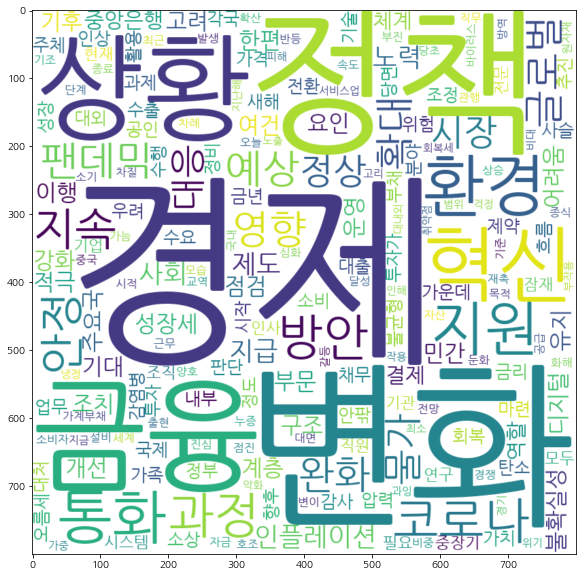

In [117]:
import matplotlib.pyplot as plt
wordcloud = wordcloud.generate_from_frequencies(tokens_rm_sw_cnt)

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud.to_array(), interpolation="bilinear")
plt.show()